In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 

Начальный MAE: 1.117211
MAE = 0.2820


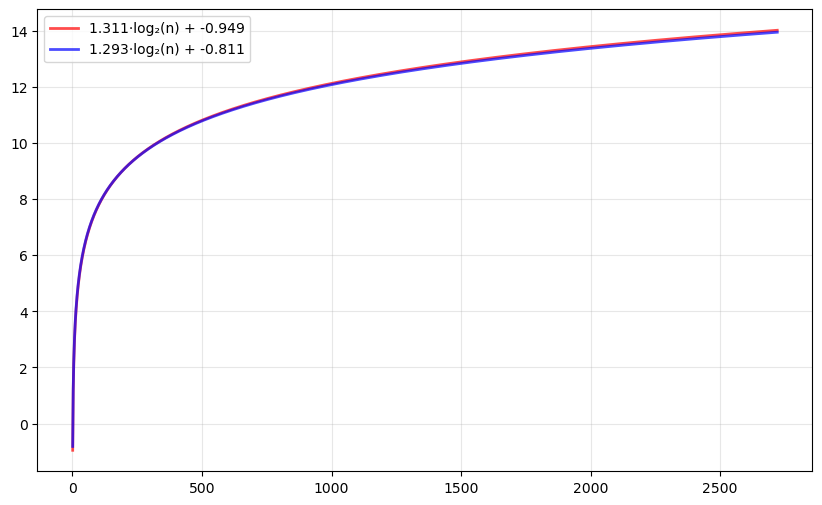

In [2]:
# через MAE
n, h = np.loadtxt('C:/Users/Admin/source/repos/3 sem for git/ALG/Alg_lab2/5.1_task.txt', unpack=True)

y = h
x = np.log2(n)
i = len(n)

plt.figure(figsize=(10, 6))

def stat(a,b):
        return a*x + b

def mae(a,b):
        f = stat(a,b)
        return np.mean(np.abs(f-y))

# E = 1/i (sum|ax+b-y|)
# dE/da = 1/i * (-1)/(1)x
# dE/db = 1/i * -1 / 1
step = 0.001
a = 1.0
b = 1.0

prev_mae = mae(a,b)
print(f"Начальный MAE: {prev_mae:.6f}")

for j in range (100000):
        e_i = a*x+b-y
        signs = np.sign(e_i)
        grad_a = np.mean(signs*x)
        grad_b = np.mean(signs)
        
        prev_a = a
        prev_b = b
        
        a-=step*grad_a
        b-=step*grad_b
        
        cur_mae = mae(a,b)
        if (prev_mae < cur_mae):
                a = prev_a
                b = prev_b
                break
        else:
                prev_mae = cur_mae

print(f"MAE = {mae(a, b):.4f}")
plt.plot(n, stat(a,b), 'red', linewidth=2, alpha=0.7,
        label=f'{a:.3f}·log₂(n) + {b:.3f}')

# через MSE по принципу linregress

# y = h, x = log_n
# E=1/i S[(ax+b-y)^2]
# dE/da = 2/i S[(ax+b-y)*x]
# dE/db = 2/i S(ax+b-y)
# S[(ax+b-y)*x] = 0  |  aS(x^2)+bS(x)-S(xy)=0
# S(ax+b-y) = 0  |  aS(x)+b*i-S(y)=0

# b = (S(y)-aS(x))/i !!!!!!!!!!!!!

# iaS(x^2)+S(y)S(x)-aS(x)S(x) - iS(xy)= 0

# a = (-S(y)S(x)+iS(xy))/(iS(x^2)-S(x)S(x)) !!!!!!!!!!!!!!!!!!
s_x = sum (x)
s_y = sum (y)
s_xy = sum(x*y)
s_xx = sum(x*x)

i = len (n)

a = (i*s_xy-s_y*s_x)/(i*s_xx-s_x*s_x)
b = (s_y-a*s_x)/i


plt.plot(n, stat(a,b), 'blue', linewidth=2, alpha=0.7,
        label=f'{a:.3f}·log₂(n) + {b:.3f}')

plt.legend()
plt.grid(True, alpha=0.3)

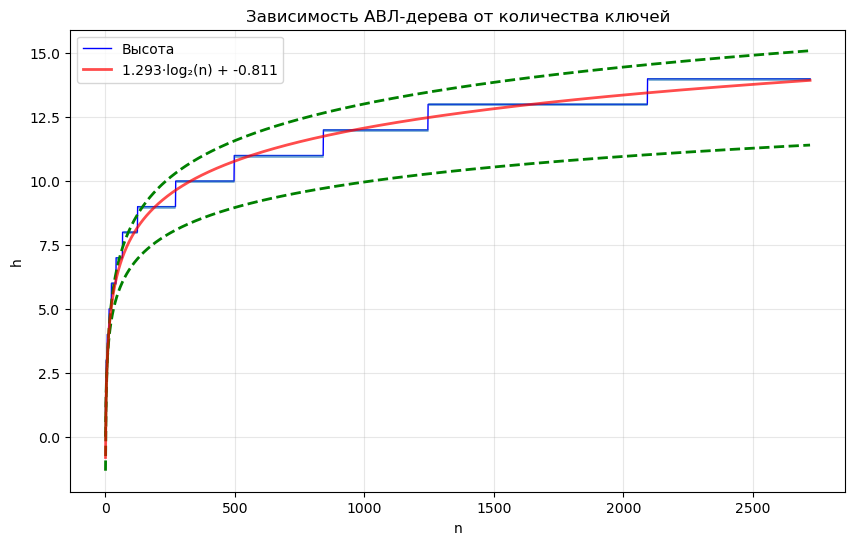

In [4]:
#с stats.linregress() для сравнения
n, h = np.loadtxt('C:/Users/Admin/source/repos/3 sem for git/ALG/Alg_lab2/5.1_task.txt', unpack=True)

plt.figure(figsize=(10, 6))

plt.plot(n, h, 'b-', linewidth=1, label='Высота')

for i in range(len(h)-1):
        if h[i] == h[i+1]:
                plt.hlines(y=h[i], xmin=n[i], xmax=n[i+1], alpha=0.7, linewidth=2)
                

# 1. ВЕРХНЯЯ ГРАНИЦА:
#1.44 log_2⁡n-1.33
plt.plot(n, 1.44*np.log2(n)-1.33, 'g--', linewidth=2)

# 2. НИЖНЯЯ ГРАНИЦА: h = log₂(n) 
plt.plot(n, np.log2(n), 'g--', linewidth=2)


log_n = np.log2(n)
A_reg, B_reg, r, _, _ = stats.linregress(log_n, h)
a_reg = A_reg 
plt.plot(n, a_reg*np.log2(n) + B_reg, 'red', linewidth=2, alpha=0.7,
        label=f'{a_reg:.3f}·log₂(n) + {B_reg:.3f}')


plt.xlabel('n')
plt.ylabel('h')
plt.title('Зависимость АВЛ-дерева от количества ключей')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()